In [1]:
from sklearn.preprocessing import StandardScaler
def normalize(data, boundary):
    scaler = StandardScaler()
    scaler.fit(data[:boundary])
    ndata = scaler.transform(data)
    return ndata

In [2]:
#Building the time series dataset 
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt

def modelfn(df, use_sentiment=False):
    input_data = df[['Open', 'High', 'Low', 'Close', 'Volume']].values
    if(use_sentiment==True):
        print('Using sentiment..')
        input_data = df[['Open', 'High', 'Low', 'Close', 'Volume', 'Sentiment Score']].values 
    targets = df['Return'].values
    T = 10                            #Time window for getting sequences for the autoregressive RNN model
    D = input_data.shape[1]
    N = len(input_data) - T
    ntrain = len(input_data) * 4 // 5  #80% data is for training, 20% is for validating
    input_data = normalize(input_data, ntrain+T)

    #Train set
    import numpy as np
    X_train = np.zeros((ntrain, T, D))
    Y_train = np.zeros(ntrain)
    for t in range(ntrain):
        X_train[t, :, :] = input_data[t:t+T]
        Y_train[t] = (targets[t+T] > 0)

    #Test set
    X_test = np.zeros((N-ntrain, T, D))
    Y_test = np.zeros(N-ntrain)
    for v in range(N-ntrain):
        t = v + ntrain
        X_test[v, :, :] = input_data[t:t+T]
        Y_test[v] = (targets[t+T] > 0)

    i = keras.layers.Input((T, D))
    h = keras.layers.LSTM(50)(i)
    o = keras.layers.Dense(1, activation='sigmoid')(h)
    fmodel = keras.models.Model(i,o)
    fmodel.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(lr=0.001), metrics=['accuracy'])

    res = fmodel.fit(X_train, Y_train, batch_size=32, epochs=300, validation_data=(X_test, Y_test))

    plt.plot(res.history['loss'], label='Train error')
    plt.plot(res.history['val_loss'], label='Test error')
    plt.legend()
    plt.show()
    plt.plot(res.history['accuracy'], label='Train accuracy')
    plt.plot(res.history['val_accuracy'], label='Test accuracy')
    plt.legend()
    plt.show()
    return (fmodel, X_train, X_test, Y_test)


In [3]:
import pandas as pd
import warnings
from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

df =  pd.read_csv('data/MSFT_with_sentiment.csv')
df['PrevClose'] = df['Close'].shift(1)
df['Return'] = (df['Close'] - df['PrevClose'])/df['PrevClose']
df_ns = df[['Open', 'High', 'Low', 'Close', 'Volume', 'Return']]
df_s = df[['Open', 'High', 'Low', 'Close', 'Volume', 'Sentiment Score', 'Return']]

Epoch 1/300
7/7 [==============================] - 1s 99ms/step - loss: 0.6960 - accuracy: 0.4627 - val_loss: 0.6928 - val_accuracy: 0.5366
Epoch 2/300
7/7 [==============================] - 0s 8ms/step - loss: 0.6886 - accuracy: 0.5672 - val_loss: 0.6917 - val_accuracy: 0.5366
Epoch 3/300
7/7 [==============================] - 0s 7ms/step - loss: 0.6848 - accuracy: 0.5970 - val_loss: 0.6912 - val_accuracy: 0.5366
Epoch 4/300
7/7 [==============================] - 0s 7ms/step - loss: 0.6791 - accuracy: 0.6119 - val_loss: 0.6945 - val_accuracy: 0.5366
Epoch 5/300
7/7 [==============================] - 0s 7ms/step - loss: 0.6794 - accuracy: 0.5821 - val_loss: 0.6999 - val_accuracy: 0.5366
Epoch 6/300
7/7 [==============================] - 0s 7ms/step - loss: 0.6769 - accuracy: 0.5721 - val_loss: 0.6973 - val_accuracy: 0.5366
Epoch 7/300
7/7 [==============================] - 0s 7ms/step - loss: 0.6748 - accuracy: 0.5771 - val_loss: 0.6966 - val_accuracy: 0.5366
Epoch 8/300
7/7 [=========

7/7 [==============================] - 0s 6ms/step - loss: 0.6429 - accuracy: 0.6219 - val_loss: 0.7353 - val_accuracy: 0.5366
Epoch 60/300
7/7 [==============================] - 0s 6ms/step - loss: 0.6415 - accuracy: 0.6318 - val_loss: 0.7317 - val_accuracy: 0.5122
Epoch 61/300
7/7 [==============================] - 0s 6ms/step - loss: 0.6404 - accuracy: 0.6169 - val_loss: 0.7445 - val_accuracy: 0.5366
Epoch 62/300
7/7 [==============================] - 0s 6ms/step - loss: 0.6405 - accuracy: 0.6269 - val_loss: 0.7266 - val_accuracy: 0.5610
Epoch 63/300
7/7 [==============================] - 0s 6ms/step - loss: 0.6400 - accuracy: 0.6269 - val_loss: 0.7501 - val_accuracy: 0.5610
Epoch 64/300
7/7 [==============================] - 0s 6ms/step - loss: 0.6401 - accuracy: 0.6219 - val_loss: 0.7830 - val_accuracy: 0.5610
Epoch 65/300
7/7 [==============================] - 0s 7ms/step - loss: 0.6377 - accuracy: 0.6219 - val_loss: 0.7696 - val_accuracy: 0.5610
Epoch 66/300
7/7 [===============

7/7 [==============================] - 0s 6ms/step - loss: 0.6022 - accuracy: 0.6517 - val_loss: 0.8352 - val_accuracy: 0.4878
Epoch 118/300
7/7 [==============================] - 0s 6ms/step - loss: 0.5957 - accuracy: 0.6617 - val_loss: 0.7469 - val_accuracy: 0.4390
Epoch 119/300
7/7 [==============================] - 0s 6ms/step - loss: 0.6001 - accuracy: 0.6617 - val_loss: 0.7129 - val_accuracy: 0.4634
Epoch 120/300
7/7 [==============================] - 0s 6ms/step - loss: 0.5964 - accuracy: 0.6716 - val_loss: 0.6999 - val_accuracy: 0.4634
Epoch 121/300
7/7 [==============================] - 0s 6ms/step - loss: 0.5968 - accuracy: 0.6617 - val_loss: 0.7376 - val_accuracy: 0.5122
Epoch 122/300
7/7 [==============================] - 0s 6ms/step - loss: 0.5971 - accuracy: 0.6517 - val_loss: 0.7766 - val_accuracy: 0.4634
Epoch 123/300
7/7 [==============================] - 0s 7ms/step - loss: 0.5964 - accuracy: 0.6567 - val_loss: 0.7237 - val_accuracy: 0.5122
Epoch 124/300
7/7 [========

7/7 [==============================] - 0s 6ms/step - loss: 0.5720 - accuracy: 0.6766 - val_loss: 0.8320 - val_accuracy: 0.5122
Epoch 176/300
7/7 [==============================] - 0s 6ms/step - loss: 0.5728 - accuracy: 0.6667 - val_loss: 0.7307 - val_accuracy: 0.4390
Epoch 177/300
7/7 [==============================] - 0s 6ms/step - loss: 0.5730 - accuracy: 0.6965 - val_loss: 0.7430 - val_accuracy: 0.4878
Epoch 178/300
7/7 [==============================] - 0s 6ms/step - loss: 0.5573 - accuracy: 0.7413 - val_loss: 0.7487 - val_accuracy: 0.4634
Epoch 179/300
7/7 [==============================] - 0s 6ms/step - loss: 0.5589 - accuracy: 0.7065 - val_loss: 0.8015 - val_accuracy: 0.4878
Epoch 180/300
7/7 [==============================] - 0s 5ms/step - loss: 0.5488 - accuracy: 0.7463 - val_loss: 0.7909 - val_accuracy: 0.4878
Epoch 181/300
7/7 [==============================] - 0s 6ms/step - loss: 0.5467 - accuracy: 0.7164 - val_loss: 0.7935 - val_accuracy: 0.4390
Epoch 182/300
7/7 [========

7/7 [==============================] - 0s 6ms/step - loss: 0.4823 - accuracy: 0.7612 - val_loss: 0.8802 - val_accuracy: 0.5366
Epoch 234/300
7/7 [==============================] - 0s 6ms/step - loss: 0.4991 - accuracy: 0.7413 - val_loss: 0.9298 - val_accuracy: 0.5366
Epoch 235/300
7/7 [==============================] - 0s 6ms/step - loss: 0.4908 - accuracy: 0.7463 - val_loss: 0.9896 - val_accuracy: 0.5366
Epoch 236/300
7/7 [==============================] - 0s 6ms/step - loss: 0.4724 - accuracy: 0.7662 - val_loss: 1.0171 - val_accuracy: 0.5610
Epoch 237/300
7/7 [==============================] - 0s 6ms/step - loss: 0.4757 - accuracy: 0.7313 - val_loss: 0.9439 - val_accuracy: 0.4390
Epoch 238/300
7/7 [==============================] - 0s 6ms/step - loss: 0.4830 - accuracy: 0.7612 - val_loss: 0.9799 - val_accuracy: 0.5610
Epoch 239/300
7/7 [==============================] - 0s 6ms/step - loss: 0.4774 - accuracy: 0.7662 - val_loss: 0.9299 - val_accuracy: 0.5122
Epoch 240/300
7/7 [========

7/7 [==============================] - 0s 6ms/step - loss: 0.3917 - accuracy: 0.8308 - val_loss: 1.0694 - val_accuracy: 0.4878
Epoch 292/300
7/7 [==============================] - 0s 6ms/step - loss: 0.4029 - accuracy: 0.8060 - val_loss: 1.1680 - val_accuracy: 0.5366
Epoch 293/300
7/7 [==============================] - 0s 6ms/step - loss: 0.4139 - accuracy: 0.8159 - val_loss: 1.1402 - val_accuracy: 0.5122
Epoch 294/300
7/7 [==============================] - 0s 6ms/step - loss: 0.3800 - accuracy: 0.8408 - val_loss: 1.0588 - val_accuracy: 0.4878
Epoch 295/300
7/7 [==============================] - 0s 6ms/step - loss: 0.3870 - accuracy: 0.8458 - val_loss: 1.0791 - val_accuracy: 0.5122
Epoch 296/300
7/7 [==============================] - 0s 6ms/step - loss: 0.3772 - accuracy: 0.8607 - val_loss: 1.0916 - val_accuracy: 0.5122
Epoch 297/300
7/7 [==============================] - 0s 6ms/step - loss: 0.3726 - accuracy: 0.8358 - val_loss: 1.0456 - val_accuracy: 0.5122
Epoch 298/300
7/7 [========

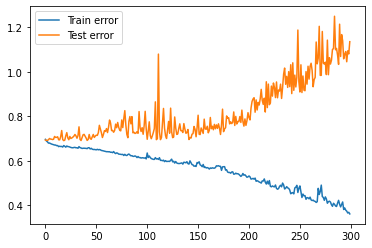

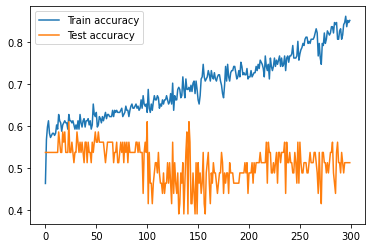

In [6]:
#Without sentiment
fmodelns, X_train_ns, X_test_ns, Y_test_ns = modelfn(df, use_sentiment=False)

Using sentiment..
Epoch 1/300
7/7 [==============================] - 1s 103ms/step - loss: 0.7191 - accuracy: 0.4378 - val_loss: 0.6925 - val_accuracy: 0.5610
Epoch 2/300
7/7 [==============================] - 0s 7ms/step - loss: 0.6989 - accuracy: 0.5025 - val_loss: 0.6924 - val_accuracy: 0.6098
Epoch 3/300
7/7 [==============================] - 0s 7ms/step - loss: 0.6889 - accuracy: 0.5920 - val_loss: 0.6922 - val_accuracy: 0.6098
Epoch 4/300
7/7 [==============================] - 0s 7ms/step - loss: 0.6844 - accuracy: 0.5871 - val_loss: 0.6921 - val_accuracy: 0.5610
Epoch 5/300
7/7 [==============================] - 0s 7ms/step - loss: 0.6823 - accuracy: 0.5821 - val_loss: 0.6931 - val_accuracy: 0.4878
Epoch 6/300
7/7 [==============================] - 0s 7ms/step - loss: 0.6802 - accuracy: 0.5821 - val_loss: 0.6929 - val_accuracy: 0.5366
Epoch 7/300
7/7 [==============================] - 0s 7ms/step - loss: 0.6777 - accuracy: 0.6020 - val_loss: 0.6923 - val_accuracy: 0.5854
Epoch 8

7/7 [==============================] - 0s 6ms/step - loss: 0.6014 - accuracy: 0.6866 - val_loss: 0.7660 - val_accuracy: 0.4634
Epoch 60/300
7/7 [==============================] - 0s 5ms/step - loss: 0.6001 - accuracy: 0.6866 - val_loss: 0.7987 - val_accuracy: 0.4878
Epoch 61/300
7/7 [==============================] - 0s 6ms/step - loss: 0.6016 - accuracy: 0.6766 - val_loss: 0.7944 - val_accuracy: 0.4390
Epoch 62/300
7/7 [==============================] - 0s 6ms/step - loss: 0.6027 - accuracy: 0.6617 - val_loss: 0.7870 - val_accuracy: 0.4390
Epoch 63/300
7/7 [==============================] - 0s 6ms/step - loss: 0.5955 - accuracy: 0.6667 - val_loss: 0.7780 - val_accuracy: 0.4634
Epoch 64/300
7/7 [==============================] - 0s 7ms/step - loss: 0.5968 - accuracy: 0.6517 - val_loss: 0.8048 - val_accuracy: 0.4878
Epoch 65/300
7/7 [==============================] - 0s 6ms/step - loss: 0.5950 - accuracy: 0.7015 - val_loss: 0.7659 - val_accuracy: 0.5122
Epoch 66/300
7/7 [===============

Epoch 117/300
7/7 [==============================] - 0s 6ms/step - loss: 0.5210 - accuracy: 0.7114 - val_loss: 1.0302 - val_accuracy: 0.4146
Epoch 118/300
7/7 [==============================] - 0s 6ms/step - loss: 0.5080 - accuracy: 0.7264 - val_loss: 0.9372 - val_accuracy: 0.4634
Epoch 119/300
7/7 [==============================] - 0s 6ms/step - loss: 0.5203 - accuracy: 0.7114 - val_loss: 0.9156 - val_accuracy: 0.4634
Epoch 120/300
7/7 [==============================] - 0s 6ms/step - loss: 0.5168 - accuracy: 0.7313 - val_loss: 1.0453 - val_accuracy: 0.3902
Epoch 121/300
7/7 [==============================] - 0s 7ms/step - loss: 0.5050 - accuracy: 0.7264 - val_loss: 0.9951 - val_accuracy: 0.4146
Epoch 122/300
7/7 [==============================] - 0s 7ms/step - loss: 0.5108 - accuracy: 0.7214 - val_loss: 0.9905 - val_accuracy: 0.4146
Epoch 123/300
7/7 [==============================] - 0s 6ms/step - loss: 0.4979 - accuracy: 0.7463 - val_loss: 1.1839 - val_accuracy: 0.4146
Epoch 124/300

7/7 [==============================] - 0s 6ms/step - loss: 0.4188 - accuracy: 0.8060 - val_loss: 1.1680 - val_accuracy: 0.3902
Epoch 176/300
7/7 [==============================] - 0s 6ms/step - loss: 0.4209 - accuracy: 0.8308 - val_loss: 1.1907 - val_accuracy: 0.4390
Epoch 177/300
7/7 [==============================] - 0s 5ms/step - loss: 0.4127 - accuracy: 0.8010 - val_loss: 1.1565 - val_accuracy: 0.4146
Epoch 178/300
7/7 [==============================] - 0s 5ms/step - loss: 0.4181 - accuracy: 0.7910 - val_loss: 1.1152 - val_accuracy: 0.3902
Epoch 179/300
7/7 [==============================] - 0s 6ms/step - loss: 0.4126 - accuracy: 0.7910 - val_loss: 1.0979 - val_accuracy: 0.3415
Epoch 180/300
7/7 [==============================] - 0s 6ms/step - loss: 0.4092 - accuracy: 0.8259 - val_loss: 1.1069 - val_accuracy: 0.3415
Epoch 181/300
7/7 [==============================] - 0s 6ms/step - loss: 0.4052 - accuracy: 0.8010 - val_loss: 1.1375 - val_accuracy: 0.3659
Epoch 182/300
7/7 [========

7/7 [==============================] - 0s 6ms/step - loss: 0.3013 - accuracy: 0.8905 - val_loss: 1.4702 - val_accuracy: 0.4146
Epoch 234/300
7/7 [==============================] - 0s 7ms/step - loss: 0.2950 - accuracy: 0.8955 - val_loss: 1.3985 - val_accuracy: 0.4146
Epoch 235/300
7/7 [==============================] - 0s 6ms/step - loss: 0.2980 - accuracy: 0.8905 - val_loss: 1.5913 - val_accuracy: 0.4146
Epoch 236/300
7/7 [==============================] - 0s 6ms/step - loss: 0.2984 - accuracy: 0.8905 - val_loss: 1.6476 - val_accuracy: 0.4390
Epoch 237/300
7/7 [==============================] - 0s 5ms/step - loss: 0.2897 - accuracy: 0.8955 - val_loss: 1.4490 - val_accuracy: 0.4146
Epoch 238/300
7/7 [==============================] - 0s 6ms/step - loss: 0.2877 - accuracy: 0.9005 - val_loss: 1.6213 - val_accuracy: 0.4390
Epoch 239/300
7/7 [==============================] - 0s 6ms/step - loss: 0.3067 - accuracy: 0.8706 - val_loss: 1.4146 - val_accuracy: 0.4146
Epoch 240/300
7/7 [========

7/7 [==============================] - 0s 6ms/step - loss: 0.2040 - accuracy: 0.9204 - val_loss: 2.1384 - val_accuracy: 0.4390
Epoch 292/300
7/7 [==============================] - 0s 6ms/step - loss: 0.2016 - accuracy: 0.9204 - val_loss: 2.1388 - val_accuracy: 0.4390
Epoch 293/300
7/7 [==============================] - 0s 6ms/step - loss: 0.1993 - accuracy: 0.9204 - val_loss: 2.1370 - val_accuracy: 0.4390
Epoch 294/300
7/7 [==============================] - 0s 6ms/step - loss: 0.1963 - accuracy: 0.9154 - val_loss: 2.1871 - val_accuracy: 0.4390
Epoch 295/300
7/7 [==============================] - 0s 6ms/step - loss: 0.1984 - accuracy: 0.9254 - val_loss: 2.2331 - val_accuracy: 0.4634
Epoch 296/300
7/7 [==============================] - 0s 6ms/step - loss: 0.2048 - accuracy: 0.9055 - val_loss: 2.1242 - val_accuracy: 0.4390
Epoch 297/300
7/7 [==============================] - 0s 6ms/step - loss: 0.1910 - accuracy: 0.9303 - val_loss: 2.2318 - val_accuracy: 0.4390
Epoch 298/300
7/7 [========

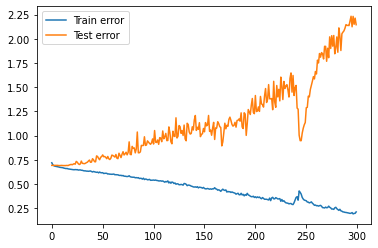

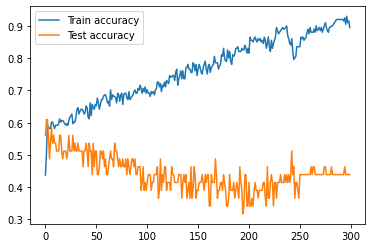

In [11]:
#With sentiment
fmodels, X_train_s, X_test_s, Y_test_s = modelfn(df, use_sentiment=True)

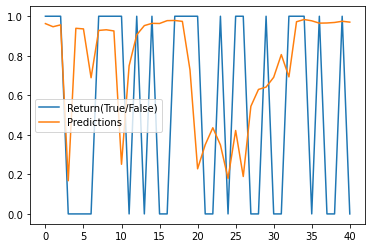

Precision:  0.4878472222222222
Recall:  0.4916267942583732
F1 score:  0.4576719576719577
Accuracy:  0.5121951219512195


In [10]:
#Without Sentiment
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score
import numpy as np
outputs_ns = fmodelns.predict(X_test_ns)
predictions_ns = outputs_ns[:, 0]
plt.plot(Y_test_ns, label='Return(True/False)')
plt.plot(predictions_ns, label='Predictions')
plt.legend()
plt.show()
y_pred = predictions_ns > 0.5
print('Precision: ', precision_score(Y_test_ns, y_pred , average="macro"))
print('Recall: ',  recall_score(Y_test_ns, y_pred , average="macro"))
print('F1 score: ', f1_score(Y_test_ns, y_pred , average="macro"))
print('Accuracy: ', accuracy_score(Y_test_ns, y_pred))

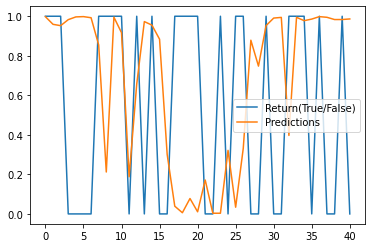

Precision:  0.4193121693121693
Recall:  0.42703349282296654
F1 score:  0.41682127396413104
Accuracy:  0.43902439024390244


In [12]:
#With Sentiment
outputs_s = fmodels.predict(X_test_s)
predictions_s = outputs_s[:, 0]
plt.plot(Y_test_s, label='Return(True/False)')
plt.plot(predictions_s, label='Predictions')
plt.legend()
plt.show()
y_pred = predictions_s > 0.5
print('Precision: ', precision_score(Y_test_s, y_pred , average="macro"))
print('Recall: ',  recall_score(Y_test_s, y_pred , average="macro"))
print('F1 score: ', f1_score(Y_test_s, y_pred , average="macro"))
print('Accuracy: ', accuracy_score(Y_test_s, y_pred))